<h1>
    <center>
        Natural Language Processing
    </center>
</h1>
<h1>
    <center>
        NLP Key Terms<br>Chunking & Chinking 
    </center>
</h1>
<br><br><br><br><br><br><br><br><br>
<h1>
    <center>By<br>
        Deval Arora<br>
 <br>
    </center>
</h1>
<br><br><br><br><br><br><br><br><br><br><br><br><br>
<h1>
    <center>
      
</h1>
<h1>
    <center>
      
</h1>



---



---


## **Contents**


---



---



* ### NLP Key Terms
  * Text
  * Document
  * Corpus
  * Useless Words
    * Punctuations
    * Stopwords
  * Tokenization
  * Stemming
  * Lemmatization
  * Vectorization
  * Parts Of Speech (POS) Tagging
* ### Chunking
* ### Chinking
* ### References





---



---



**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import re
import string

import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## NLP Key Terms (Demo Using Movie Reviews Dataset)

### 1. Text
A **group of words** or sentences forms the text. Text is the input to the NLP systems. It is a form of data, and it can be processed or un-processed. Depending upon the state of text, appropriate NLP methods are applied to get the text in form in which it can be used by the NLP systems (models).

### 2. Document
A **group of text** together make up what is called a document. Generally text is available in form of documents to us and we use libraries such as tika, pandas, etc to fetch text from the documents.

### 3. Corpus
Corpus is a **collection of text and/or documents**. One of the commonly used corpus used to practice NLP is movie reviews corpus.


In [ ]:
files = movie_reviews.fileids()
print(f'Total number of files in the movie review corpus: {len(files)}')

Total number of files in the movie review corpus: 2000


In [ ]:
text = ' '.join(movie_reviews.words(files[0]))
text

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no 

Selecting subset of text for further demonstration.

In [ ]:
text = text[:100]
text

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . on'

### 3. Useless Words
In the above text we can see that there are many words that will not be helpful in analyzing the text. These are called as useless words. **Punctuations and stopwords, words like a, an, the, etc** are called stopwords, these two together form useless words.<br>
Useless words are reqired to be removed from the text.

In [ ]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
#  first 10 stopwords
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
uselesswords = list(punctuations) + stopwords
# first 15 useless words
uselesswords[:15]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/']

In [ ]:
filtered_text = ' '.join([word for word in text.split() if word not in uselesswords])
print('Text before useless words removal')
print(text)
print('\nText after useless words removal') 
print(filtered_text)

Text before useless words removal
plot : two teen couples go to a church party , drink and then drive . they get into an accident . on

Text after useless words removal
plot two teen couples go church party drink drive get accident


### 5. Tokenization
Tokenization refers to **splitting up a larger body of text** into smaller words/tokens. Tokens differ from the words in the sense that tokens comprise of words, punctuations and other symbols.

In [ ]:
tokens = nltk.word_tokenize(filtered_text)
tokens

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident']

### 6. Stemming
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [ ]:
print('word: stemmed word')
for token in tokens:
  print(f'{token}: {nltk.stem.PorterStemmer().stem(token)}')

word: stemmed word
plot: plot
two: two
teen: teen
couples: coupl
go: go
church: church
party: parti
drink: drink
drive: drive
get: get
accident: accid


### 7. Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [ ]:
print('word: lemmatized word')
for token in tokens:
  print(f'{token}: {nltk.WordNetLemmatizer().lemmatize(token)}')

word: lemmatized word
plot: plot
two: two
teen: teen
couples: couple
go: go
church: church
party: party
drink: drink
drive: drive
get: get
accident: accident


### 8. Vectorization
The process of converting words into numbers is called Vectorization. Two methods that we will be demonstrating are as below:
* **Count Vectorization:** Provides output an integer that represents the count of word in the document.
* **TFIDF:** stands for term frequency–inverse document frequency. The output for this is a float.

**Count Vectorizer**

In [ ]:
text2 = 'plot three adults go temple prayer drive get home'
count_vect = CountVectorizer()
counts = count_vect.fit_transform([filtered_text, text2])

In [ ]:
count_vect.get_feature_names()

['accident',
 'adults',
 'church',
 'couples',
 'drink',
 'drive',
 'get',
 'go',
 'home',
 'party',
 'plot',
 'prayer',
 'teen',
 'temple',
 'three',
 'two']

In [ ]:
df = pd.DataFrame(counts.toarray(), columns=count_vect.get_feature_names())
df

,accident,adults,church,couples,drink,drive,get,go,home,party,plot,prayer,teen,temple,three,two
0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,1
1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0


**TF IDF**

In [ ]:
tf = TfidfVectorizer()
tf_counts = tf.fit_transform([filtered_text, text2])

In [ ]:
df = pd.DataFrame(tf_counts.toarray(), columns=tf.get_feature_names())
df

,accident,adults,church,couples,drink,drive,get,go,home,party,plot,prayer,teen,temple,three,two
0,0.332872,0.000000,0.332872,0.332872,0.332872,0.236841,0.236841,0.236841,0.000000,0.332872,0.236841,0.000000,0.332872,0.000000,0.000000,0.332872
1,0.000000,0.377292,0.000000,0.000000,0.000000,0.268446,0.268446,0.268446,0.377292,0.000000,0.268446,0.377292,0.000000,0.377292,0.377292,0.000000


### 9. Parts Of Speech (POS) Tagging
POS-Tagging is one of the fundamental operation in NLP. It is a process in which **each word is assigned a syntactical category**. These can noun, verb, modal, etc.

In [ ]:
sample_text = 'India, officially the Republic of India is a country in South Asia.'
wordsList = nltk.word_tokenize(sample_text)
wordsList = [word for word in wordsList if word not in string.punctuation]
tagged_words = nltk.pos_tag(wordsList)
tagged_words

[('India', 'NNP'),
 ('officially', 'RB'),
 ('the', 'DT'),
 ('Republic', 'NNP'),
 ('of', 'IN'),
 ('India', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('country', 'NN'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('Asia', 'NNP')]

## Chunking

Chunking refers to the process of identifying the constituent parts of a sentence such as a verb, nouns, adjectives, etc. In order to do so POS-Tagging is required as the first step.

Flow is as below:<br>
**Text** &#8594; **Tokens** &#8594; **POS-Tagging** &#8594; **Chunking**

The purpose of chunking is to break the text into groups that are more meaningful and related.

Chunking creates word trees with the grammer we define for creating chunks.

Steps For Chunking:
* Prepare the **pos-tagged text**
* **Define a rule** based on which you want to chunk
* **Initialize a parser** by passing in the defined rule
* **Parse the tagged words** using parser
* **Visualize** the chunks

In the example below we have defined a rule that enables the parser to look for nouns followed by prepositions followed by nouns. The tagged words are prepared above.

In [ ]:
rule = "NP: {<NN.?>*<IN>*<NN.?>*}"
parser = nltk.RegexpParser(rule)
result = parser.parse(tagged_words)
print("Chunk Tree : \n{}".format(result))
# result.draw()

Chunk Tree : 
(S
  (NP India/NNP)
  officially/RB
  the/DT
  (NP Republic/NNP of/IN India/NNP)
  is/VBZ
  a/DT
  (NP country/NN in/IN South/NNP Asia/NNP))


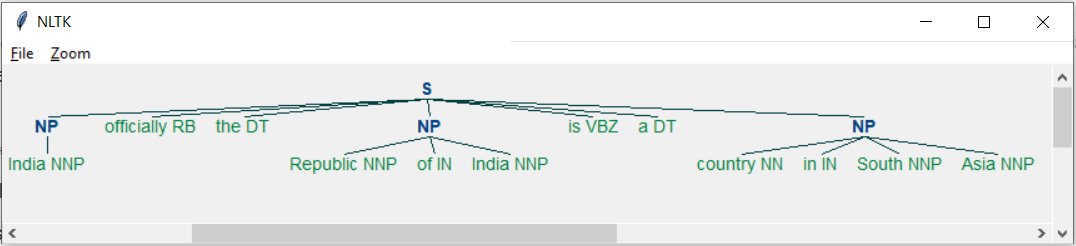

## Chinking

* Chinking is similar to chunking. The difference between chunking and chinking is that in chunking we specify what we are looking for, whereas in chinking we specify what we do not want as chunks.

* Chinking is done after chunking. Chinking helps in refining the chunks produced by chunking process.

* `{}` is used to indicate/extract a chunk and `}{` is used to indicate/extract a chink. 

In [ ]:
rule2 = """NP: {<.*>+} 
          }<VB.? | DT>+{"""
parser2 = nltk.RegexpParser(rule2)
result2 = parser2.parse(tagged_words)
print("Chunk Tree : \n{}".format(result2))
# result2.draw()

Chunk Tree : 
(S
  (NP India/NNP officially/RB)
  the/DT
  (NP Republic/NNP of/IN India/NNP)
  is/VBZ
  a/DT
  (NP country/NN in/IN South/NNP Asia/NNP))


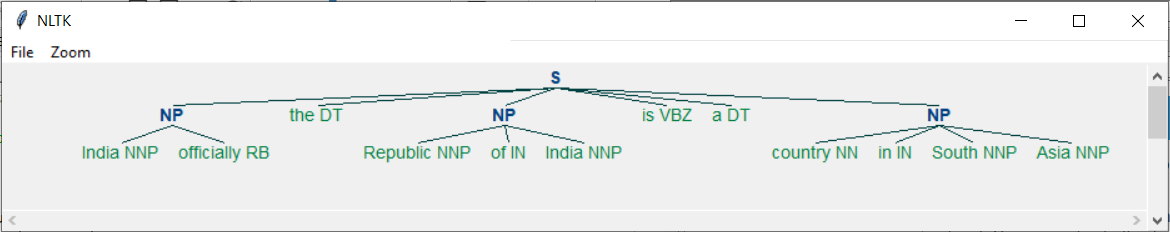

In the above example we followed 2 step approach. First we chunked everything together and then we removed all the words from the chunk that had pos tag VB or DT. So we can see that 'the', 'is' and 'a' were removed from the chunk.

To **summarize**, chunking and chinking are methods of filtering text based on pos-tags. This essentially makes use of regular expressions.



## References
* [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
* [NLP Parts Of Speech](https://www.geeksforgeeks.org/nlp-part-of-speech-default-tagging/#:~:text=Whats%20is%20Part%2Dof%2Dspeech,%2C%20verb%2C%20and%20so%20on.)
* [List of part-of-speech tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
* [Regular Expressions](https://www.w3schools.com/python/python_regex.asp)
* [Chunking Implementation](https://www.youtube.com/watch?v=imPpT2Qo2sk&t=292s)
* [Chinking Implementation](https://www.youtube.com/watch?v=EymPQgCtcAE)